In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

analysis = 'bp2batches'
analysis_date = 'Aug24'

analysis_date = '_' + analysis_date

if analysis is not None:
    analysis_name = analysis + '_'
else:
    analysis_name = ''


distance_metric = 'correlation'
max_epoch = 1
# iter = '_iter-3'
iter = '_iter-4'

# If want to include untrained network, set range as 
untrained_starting_point = True 
if untrained_starting_point:
    start = 0
else:
    start = 1


# create list of epochs
epoch_list = [i for i in range(start,max_epoch +1)]
print(epoch_list)

roilist = ['evc','vvc']
roi_labels = ['EVC','VTC']
layerlist = [f'layer_{i}' for i in range(49)] 
agelist = ['twomonth','ninemonth','adult']
age_labels = ['2-months','9-months','Adult']

[0, 1]


In [3]:

if 'bp2' in analysis:
    # train_bands = ['all','low'] #Add add later!! NB train an ALL!! #'high', 'mid',
    train_bands = ['all', 'low', 'high'] #['all', 'low', 'high']
    # possibly add untrained data here

    test_bands = train_bands # For now!!
    # test_bands = ['all', 'low', 'mid','high'] # 'mid' 'all',

    batch_names = ['untrained','batch1001', 'batch2002', 'batch3003', 'batch4004', 'complete']
    batch_numbers = [0, 1001, 2002, 3003, 4004, 5005]

repo_path = '/home/ainedineen/blurry_vision/blurry_representations'
# COnsider changing name form base_path to rdm_path later?
base_path = os.path.join(repo_path,'revised_data_rdms',f'dnn_{analysis_name}{distance_metric}_outputs{analysis_date}')

 # 'pairwise' or 'corrcoef'
# distance_metric = 'covariance'

# Revised Images
image_view = 'square_224_images_for_nets'

pwd = "/home/ainedineen/blurry_vision/blurry_representations/revised_data_rdms"
# data_src = os.path.join(pwd, 'data')
data_src = os.path.join(repo_path, 'revised_data_rdms', 'data')



In [4]:
pths = []


for train_band in train_bands:
    test_band = train_band
    # for train_band in train_bands:
    # if train_band == 'all':
        
    # 

    for epoch in epoch_list:
        # If epoch is 0, we also want to test on the untrained network
        if epoch == 0:
            batch_names = ['batch1001', 'batch2002', 'batch3003', 'batch4004', 'complete', 'untrained']
        else:
            batch_names = ['batch1001', 'batch2002', 'batch3003', 'batch4004', 'complete']
        for batch_idx, batch in enumerate(batch_names):
                
            # We only want to test on the same band as tested!
            if ((train_band == test_band) ): #or (train_band == 'untrained' and epoch == 0)
                print(f'train_band: {train_band}, test_band: {test_band}, epoch: {epoch}, batch: {batch}')
                # Choosen Analysis Type
                if analysis == 'bp2batches':

                    if test_band == 'all':
                        chosen_stimulus = f'fcpics-standard_size-max'
                    else:
                    # chosen_stimulus = f'fcpics-bandpass_{test_band}_size-max'
                        chosen_stimulus = f'fcpics-butterworth_{test_band}_cut-0.055-0.15_order-3.0_npad-40_size-max'
                    
                    # NEED TO ADD UNTRAINED TO THIS!!
                    csv_file_name = f'net-resnet50_BP2-{train_band}_batches_E{epoch}_{batch}{iter}_met-{distance_metric}_stim-{chosen_stimulus}.csv'
                else:
                    raise ValueError('Analysis either not implemented or recognized')
                

                # Saving in chosen stimulus folder is ineffective as will save in last stimulus folder only 
                # Create a new folder
                stim_dep_out_path = os.path.join(base_path, chosen_stimulus)

                corr_path = os.path.join(stim_dep_out_path, f'{distance_metric}')
                # save_path = os.path.join(stim_dep_out_path, ' layerplots')
                # save_dir = os.path.join(base_path, 'compare_layers')
                
                save_dir = os.path.join(base_path, 'correlations_with_brain_wrt_training', analysis)
                
                if not os.path.exists(save_dir):
                    os.makedirs(save_dir)

                corr_csv = os.path.join(corr_path, csv_file_name)
                
                # COULD ADD if epoch ==0  'untrained'  instead of 'train_band' BUT the current setup may be more flexible in future!
                # add epoch
                if os.path.exists(corr_csv):
                    pths.append((train_band, test_band, epoch, batch, glob.glob(corr_csv)))
                else:
                    print(f'corr_csv: {corr_csv}')
                    raise ValueError(f'Path for train smoothness {train_band}, test smoothness {test_band} does not exist!')
                
batch_names = ['batch1001', 'batch2002', 'batch3003', 'batch4004', 'complete', 'untrained']

train_band: all, test_band: all, epoch: 0, batch: batch1001
train_band: all, test_band: all, epoch: 0, batch: batch2002
train_band: all, test_band: all, epoch: 0, batch: batch3003
train_band: all, test_band: all, epoch: 0, batch: batch4004
train_band: all, test_band: all, epoch: 0, batch: complete
train_band: all, test_band: all, epoch: 0, batch: untrained
train_band: all, test_band: all, epoch: 1, batch: batch1001
train_band: all, test_band: all, epoch: 1, batch: batch2002
train_band: all, test_band: all, epoch: 1, batch: batch3003
train_band: all, test_band: all, epoch: 1, batch: batch4004
train_band: all, test_band: all, epoch: 1, batch: complete
train_band: low, test_band: low, epoch: 0, batch: batch1001
train_band: low, test_band: low, epoch: 0, batch: batch2002
train_band: low, test_band: low, epoch: 0, batch: batch3003
train_band: low, test_band: low, epoch: 0, batch: batch4004
train_band: low, test_band: low, epoch: 0, batch: complete
train_band: low, test_band: low, epoch: 0, 

In [5]:
print(pths)
print(len(pths))

print(f'shape of corr: {len(pths)}')

[('all', 'all', 0, 'batch1001', ['/home/ainedineen/blurry_vision/blurry_representations/revised_data_rdms/dnn_bp2batches_correlation_outputs_Aug24/fcpics-standard_size-max/correlation/net-resnet50_BP2-all_batches_E0_batch1001_iter-4_met-correlation_stim-fcpics-standard_size-max.csv']), ('all', 'all', 0, 'batch2002', ['/home/ainedineen/blurry_vision/blurry_representations/revised_data_rdms/dnn_bp2batches_correlation_outputs_Aug24/fcpics-standard_size-max/correlation/net-resnet50_BP2-all_batches_E0_batch2002_iter-4_met-correlation_stim-fcpics-standard_size-max.csv']), ('all', 'all', 0, 'batch3003', ['/home/ainedineen/blurry_vision/blurry_representations/revised_data_rdms/dnn_bp2batches_correlation_outputs_Aug24/fcpics-standard_size-max/correlation/net-resnet50_BP2-all_batches_E0_batch3003_iter-4_met-correlation_stim-fcpics-standard_size-max.csv']), ('all', 'all', 0, 'batch4004', ['/home/ainedineen/blurry_vision/blurry_representations/revised_data_rdms/dnn_bp2batches_correlation_outputs_A

In [6]:

# Put in numpy array
# DO NOT ADD ACCURACY HERE, CREATE IT'S OWN ARRAY
corr = np.zeros((len(roilist),len(agelist),len(train_bands), len(test_bands),len(layerlist), len(epoch_list), len(batch_names))) 


corr[:,:,:,:,:,:,:] = np.nan # check that every cell gets something!


# Pths is a list of tuples, first element - smoothing, second element - path to the file
for file in pths:
    # print(file[4])
    epoch = file[2]

    # file[3][0] is the path to the csv file
    df = pd.read_csv(file[4][0])
    # print(df.head())

    for row in df.iterrows():

        # added epoch, unsure if this is correct!!
        corr[roilist.index(row[1]['roi']),agelist.index(row[1]['age']),train_bands.index(file[0]), train_bands.index(file[1]),layerlist.index(row[1]['layer']),file[2], batch_names.index(file[3]), ] = row[1]['corr']






In [7]:
# corr is a numpy array, so we need to convert it to a pandas dataframe
# We need to create a multiindex dataframe, with the first level being the ROI, the second level being the age, the third level being the training smoothness, the fourth level being the test smoothness, and the fifth level being the layer
# We can use the pd.MultiIndex.from_product function to create the multiindex
# Create the multiindex
multiindex = pd.MultiIndex.from_product([roilist, agelist, train_bands, test_bands, layerlist, epoch_list, batch_names], names=['roi', 'age', 'train_band', 'test_band', 'layer', 'epoch', 'batch'])
# Create the dataframe
df = pd.DataFrame(corr.flatten(), index=multiindex, columns=['corr'])
# Reset the index
df.reset_index(inplace=True)

# print(f'columns: {df.columns}')


# create df of mean across layers
# df_mean_across_layers = df.groupby(['roi', 'age', 'train_smooth', 'test_smooth', 'epoch']).mean()
df_mean_across_layers = df.groupby(['roi', 'age', 'train_band', 'test_band', 'epoch', 'batch']).mean()
df_std_across_layers = df.groupby(['roi', 'age', 'train_band', 'test_band', 'epoch', 'batch']).std()
# Drop NaNs at least for now!
# df_mean_across_layers = df.groupby(['roi', 'age', 'train_band', 'test_band', 'epoch'], dropna=False).mean()


df_mean_across_layers.reset_index(inplace=True)
# print(df_mean_across_layers)


df_mean_across_layers['batch'] = df_mean_across_layers['batch'].apply(lambda x: x.replace('batch',''))
# rep;ace 'complete with 5005
df_mean_across_layers['batch'] = df_mean_across_layers['batch'].apply(lambda x: x.replace('complete','5005'))
df_mean_across_layers['batch'] = df_mean_across_layers['batch'].apply(lambda x: x.replace('untrained','0'))

# convert to int
df_mean_across_layers['batch'] = df_mean_across_layers['batch'].apply(lambda x: int(x))

# create new column -( epoch * 5005) + batch
df_mean_across_layers['x_axis'] = df_mean_across_layers['batch'] + (df_mean_across_layers['epoch'] * 5005)
# print(df_mean_across_layers)


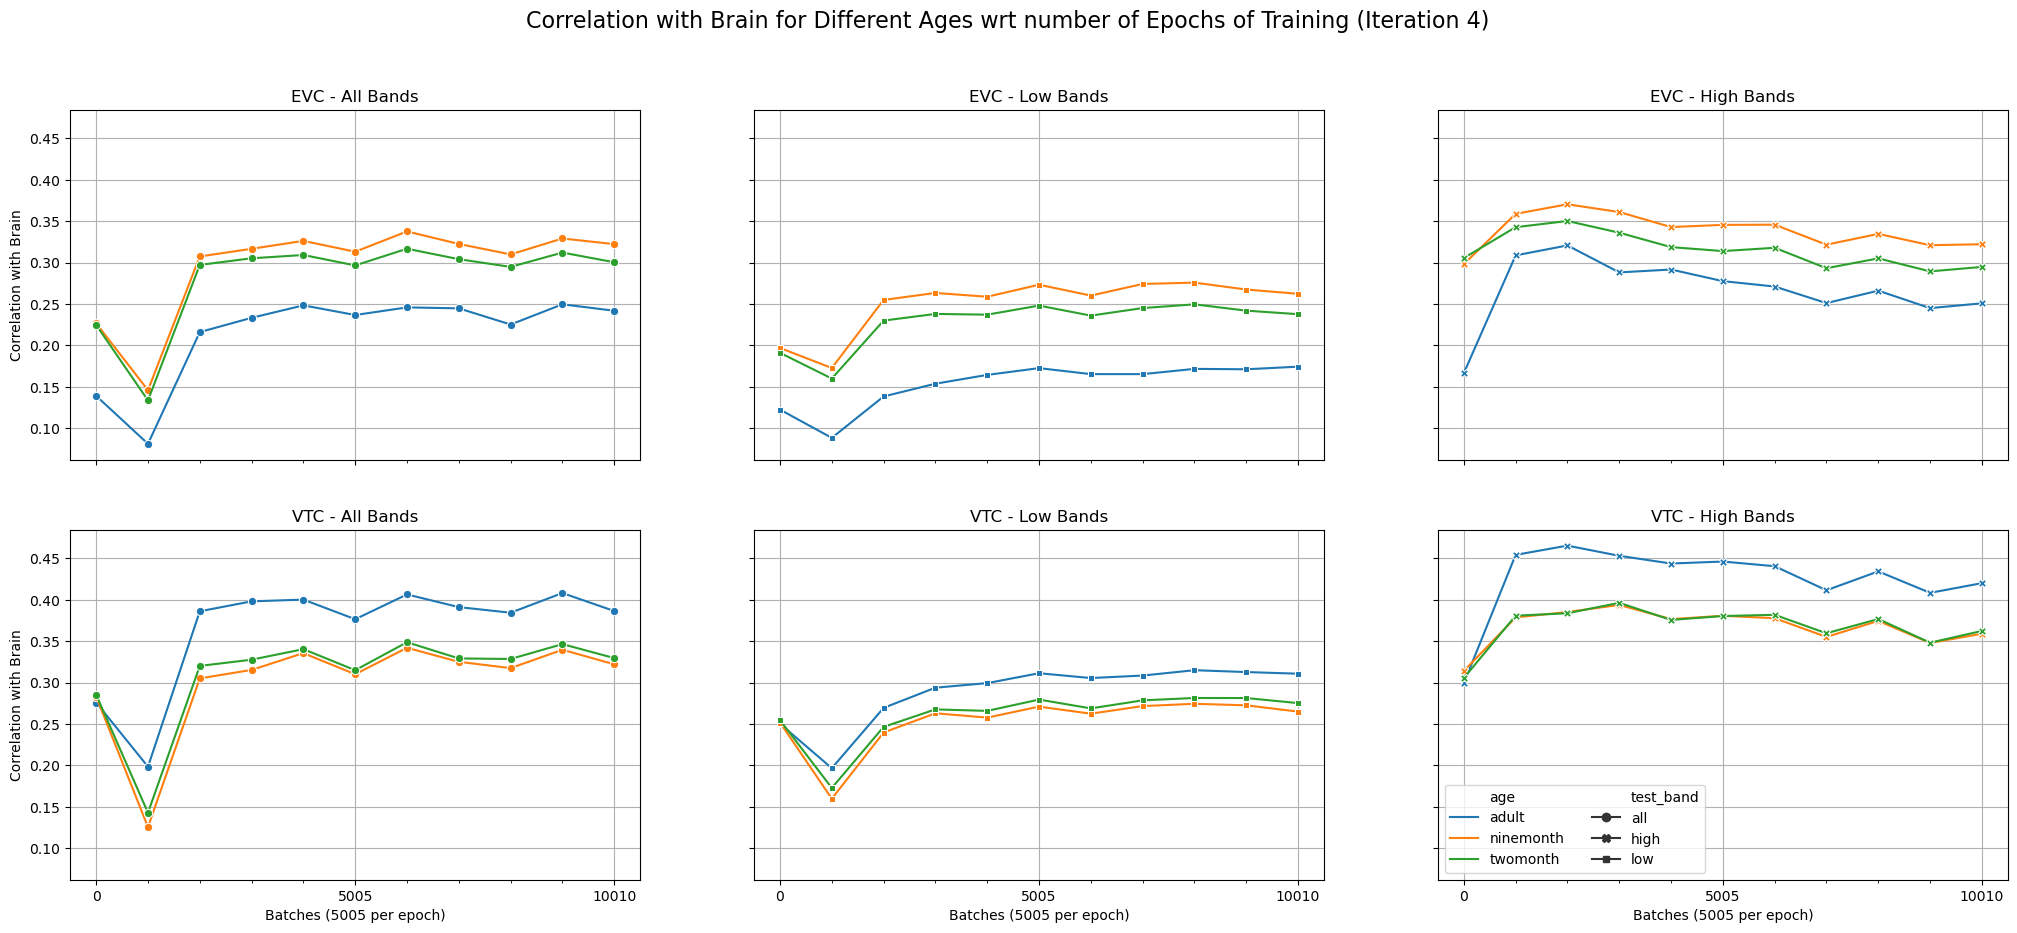

In [8]:
# Copy in case mess up below!!

# Create a Plot from df_mean_across_layers with seaborn, with a column for each ROI and a row for each train band. Each plot will have a line for each age. Test bands will match train bands. 

fig, ax = plt.subplots(len(roilist),len(train_bands),figsize=(25,10), sharex=True, sharey=True)
# epoch on x-axis
# corr on y-axis
# hue for age
# style for test smoothness
# col for roi

# print(df_mean_across_layers)

for train_idx, train_band in enumerate(train_bands):
    for roi_idx, roi in enumerate(roilist):
        # sns.lineplot(data=df_mean_across_layers[(df_mean_across_layers['roi'] == roi) & (df_mean_across_layers['train_band'] == train_band)], x='epoch', y='corr', hue='age', ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
        sns.lineplot(data=df_mean_across_layers[(df_mean_across_layers['roi'] == roi) & (df_mean_across_layers['train_band'] == train_band)], x='x_axis', y='corr', hue='age', ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)

        # # Add standard deviation across layers
        # sns.lineplot(data=df[(df['roi'] == roi) & (df['train_band'] == train_band)],x='epoch', y='corr', hue='age', marker='o', estimator=np.mean, errorbar='sd', ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
        # Error dedaults to 95% confidence interval ('ci', 95)
        # sns.lineplot(data=df[(df['roi'] == roi) & (df['train_band'] == train_band)],x='epoch', y='corr', hue='age', marker='o', estimator=np.mean, ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
    


# set x-axis values from epoch_list
for i in range(len(roilist)):
    for j in range(len(train_bands)):
        ax[i,j].set_title(f'{roi_labels[i]} - {train_bands[j].capitalize()} Bands')
        ax[i,j].set_xlabel('Batches (5005 per epoch)')
        # set major x axis ticks at multiples of 5005
        ax[i,j].xaxis.set_major_locator(plt.MultipleLocator(5005))
        ax[i,j].xaxis.set_minor_locator(plt.MultipleLocator(1001))
        ax[i,j].set_ylabel('Correlation with Brain')
        ax[i,j].grid()
        ax[i,j].get_legend().remove()

# Plot legend in final subplot only, format with two columns
ax[-1,-1].legend( ncol=2) 

# add title 
fig.suptitle(f'Correlation with Brain for Different Ages wrt number of Epochs of Training (Iteration {iter.split("-")[-1]})', fontsize=16)

plt.savefig(os.path.join(save_dir, f'corr_with_brain_byBand_{analysis_name}{distance_metric}_outputs{analysis_date}_epoch-{start}-{max_epoch}_iter-{iter.split("-")[-1]}.png'))

# show the plot
plt.show()

In [9]:

# TO DO: Load accuracy data here too!
accuracy_path = "/home/ainedineen/blurry_vision/pytorch_untrained_models/imagenet/bandpass_analysis_butterworth/batched_accuracy"
# supervised_resnet50_bp_butter_train-all_test-all_iter-0_accuracy.csv"
accuracy_file = "supervised_resnet50_bp_butter_train-{train_band}_test-{test_band}{iter}_accuracy.csv"


master_accuracy_df = pd.DataFrame()

for test_band in test_bands:
    train_band = test_band
# for train_band in train_bands:
    # if train_band == 'all':
    #     iter = '_iter-1'
    # else:
    #     iter = ''
    

    # Load accuracy csv as df
    accuracy_csv = os.path.join(accuracy_path, accuracy_file.format(train_band=train_band, test_band=test_band, iter=iter))
    if os.path.exists(accuracy_csv):
        accuracy_df = pd.read_csv(accuracy_csv, index_col=0)
    else:
        raise ValueError(f'Accuracy csv {accuracy_csv} does not exist!')


    if master_accuracy_df.empty:
        master_accuracy_df = accuracy_df
    else:
        master_accuracy_df = pd.concat([master_accuracy_df, accuracy_df], axis=0)

master_accuracy_df['batch'] = master_accuracy_df['batch'].replace(np.nan, 0)

# convert all values that are not 'nans' to int
master_accuracy_df['batch'] = master_accuracy_df['batch'].astype(int)

print(master_accuracy_df['batch'].unique())

master_accuracy_df['x_axis'] = master_accuracy_df['batch'] + (master_accuracy_df['epoch'] * 5005)
print(master_accuracy_df)


# only keep columns where train_band == test_band
master_accuracy_df = master_accuracy_df[master_accuracy_df['train_band'] == master_accuracy_df['test_band']]
# master_accuracy_df = master_accuracy_df[master_accuracy_df['train_band'] == 'all']

# TO DO: ADAPT to deal with iter later!! if iter in string extract into new column, else value is '0'
# create model name column
master_accuracy_df['model_name'] = master_accuracy_df['model_pth'].apply(lambda x: x.split('checkpoint_')[1].split('_epoch_epoch')[0])
print(master_accuracy_df['model_name'].unique())

[   0 1001 2002 3003 4004 5005]
                                            model_pth  epoch  batch  top1acc  \
0   checkpoint_supervised_resnet50_bp_butter_all_b...      0      0    0.100   
1   checkpoint_supervised_resnet50_bp_butter_all_b...      0   1001    0.780   
2   checkpoint_supervised_resnet50_bp_butter_all_b...      0   2002    4.582   
3   checkpoint_supervised_resnet50_bp_butter_all_b...      0   3003    7.260   
4   checkpoint_supervised_resnet50_bp_butter_all_b...      0   4004   11.198   
..                                                ...    ...    ...      ...   
21  checkpoint_supervised_resnet50_bp_butter_high_...      4   1001   33.508   
22  checkpoint_supervised_resnet50_bp_butter_high_...      4   2002   33.182   
23  checkpoint_supervised_resnet50_bp_butter_high_...      4   3003   35.130   
24  checkpoint_supervised_resnet50_bp_butter_high_...      4   4004   27.854   
25  checkpoint_supervised_resnet50_bp_butter_high_...      4   5005   34.282   

    top

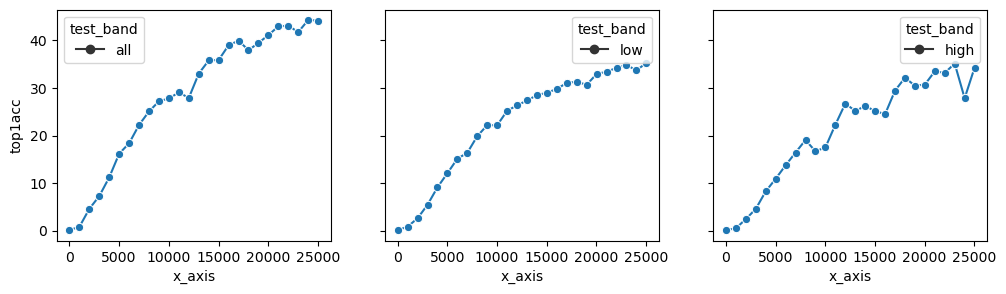

In [10]:

fig, ax = plt.subplots(1, len(train_bands),figsize=(12,3), sharex=True, sharey=True)

for train_idx, train_band in enumerate(train_bands):
     sns.lineplot(data=master_accuracy_df[(master_accuracy_df['train_band'] == train_band)], x='x_axis', y='top1acc', ax=ax[train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)

plt.show()

In [11]:

# divide values by 100 in master_accuracy_df
master_accuracy_df['top1acc'] = master_accuracy_df['top1acc'] / 100
master_accuracy_df['top5acc'] = master_accuracy_df['top5acc'] / 100

# divide by 5005 to get epoch number
# master_accuracy_df['epoch'] = master_accuracy_df['x_axis'] / 5005
# df_mean_across_layers['epoch'] = df_mean_across_layers['x_axis'] / 5005



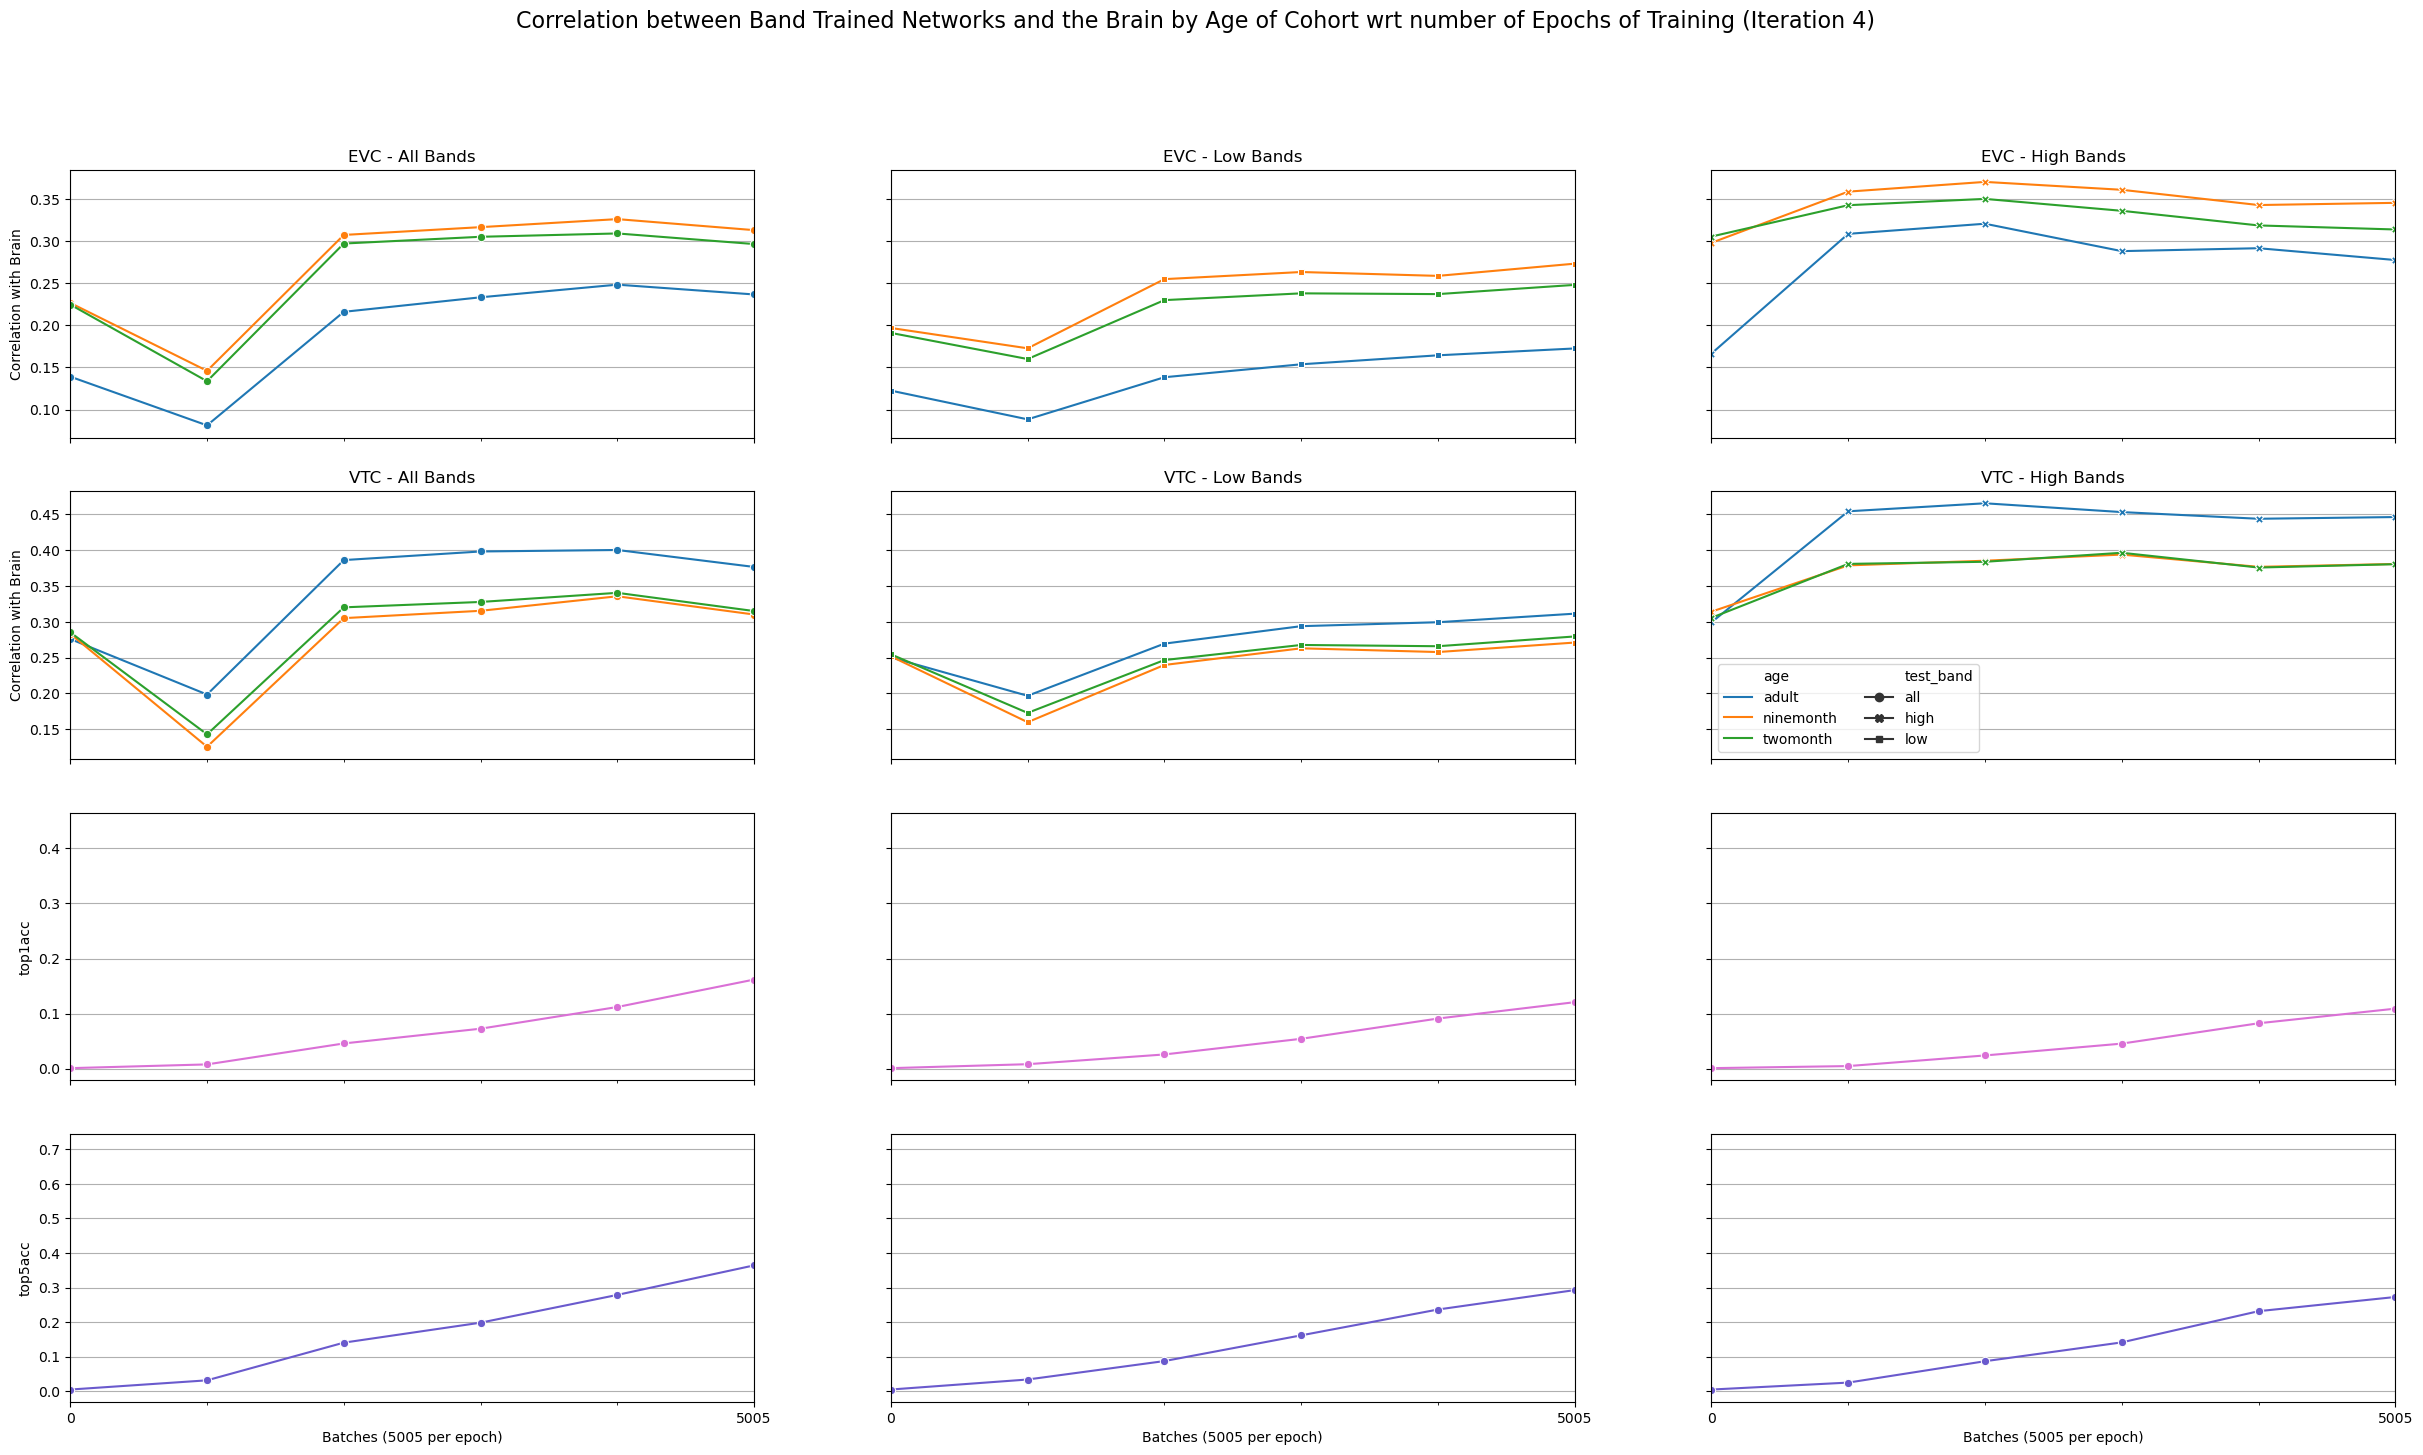

In [12]:
# Create a Plot from df_mean_across_layers with seaborn, with a column for each ROI and a row for each train band. Each plot will have a line for each age. Test bands will match train bands. 

# share y for each row


fig, ax = plt.subplots(len(roilist)+2,len(train_bands),figsize=(30,16), sharex=True,  sharey='row')


for train_idx, train_band in enumerate(train_bands):
    sns.lineplot(data=master_accuracy_df[(master_accuracy_df['train_band'] == train_band)], x='x_axis', y='top1acc', ax=ax[-2, train_idx], style='test_band' ,markers=True, dashes=False, color='orchid')#, hue_order=hue_order)#, palette=palette)
    sns.lineplot(data=master_accuracy_df[(master_accuracy_df['train_band'] == train_band)], x='x_axis', y='top5acc', ax=ax[-1, train_idx], style='test_band' ,markers=True, dashes=False,  color='slateblue')#, hue_order=hue_order)#, palette=palette)
        
    for roi_idx, roi in enumerate(roilist):
        # sns.lineplot(data=df_mean_across_layers[(df_mean_across_layers['roi'] == roi) & (df_mean_across_layers['train_band'] == train_band)], x='epoch', y='corr', hue='age', ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
        sns.lineplot(data=df_mean_across_layers[(df_mean_across_layers['roi'] == roi) & (df_mean_across_layers['train_band'] == train_band)], x='x_axis', y='corr', hue='age', ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)

        # # Add standard deviation across layers
        # sns.lineplot(data=df[(df['roi'] == roi) & (df['train_band'] == train_band)],x='epoch', y='corr', hue='age', marker='o', estimator=np.mean, errorbar='sd', ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
        # Error dedaults to 95% confidence interval ('ci', 95)
        # sns.lineplot(data=df[(df['roi'] == roi) & (df['train_band'] == train_band)],x='epoch', y='corr', hue='age', marker='o', estimator=np.mean, ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
    

for i in range(len(roilist)):
    for j in range(len(train_bands)):
         ax[i,j].set_title(f'{roi_labels[i]} - {train_bands[j].capitalize()} Bands')
         ax[i,j].set_ylabel('Correlation with Brain')

# set x-axis values from epoch_list
for i in range(len(roilist)+2):
    for j in range(len(train_bands)):
       
        ax[i,j].set_xlabel('Batches (5005 per epoch)')
        # set major x axis ticks at multiples of 5005
        ax[i,j].xaxis.set_major_locator(plt.MultipleLocator(5005))
        ax[i,j].xaxis.set_minor_locator(plt.MultipleLocator(1001))
        # set y axis limits
        ax[i,j].xaxis.set_major_locator(plt.MultipleLocator(5005))
        ax[i,j].set_xlim(0,5005*max_epoch)
        
        ax[i,j].grid()
        ax[i,j].get_legend().remove()

# Plot legend in final subplot only, format with two columns
ax[1,-1].legend( ncol=2) 

# add title 
# fig.suptitle(f'Correlation with Brain for Bands Ages wrt Age of Cohort (Iteration {iter.split("-")[-1]})', fontsize=16)
fig.suptitle(f'Correlation between Band Trained Networks and the Brain by Age of Cohort wrt number of Epochs of Training (Iteration {iter.split("-")[-1]})', fontsize=16)


# show the plot
plt.show()


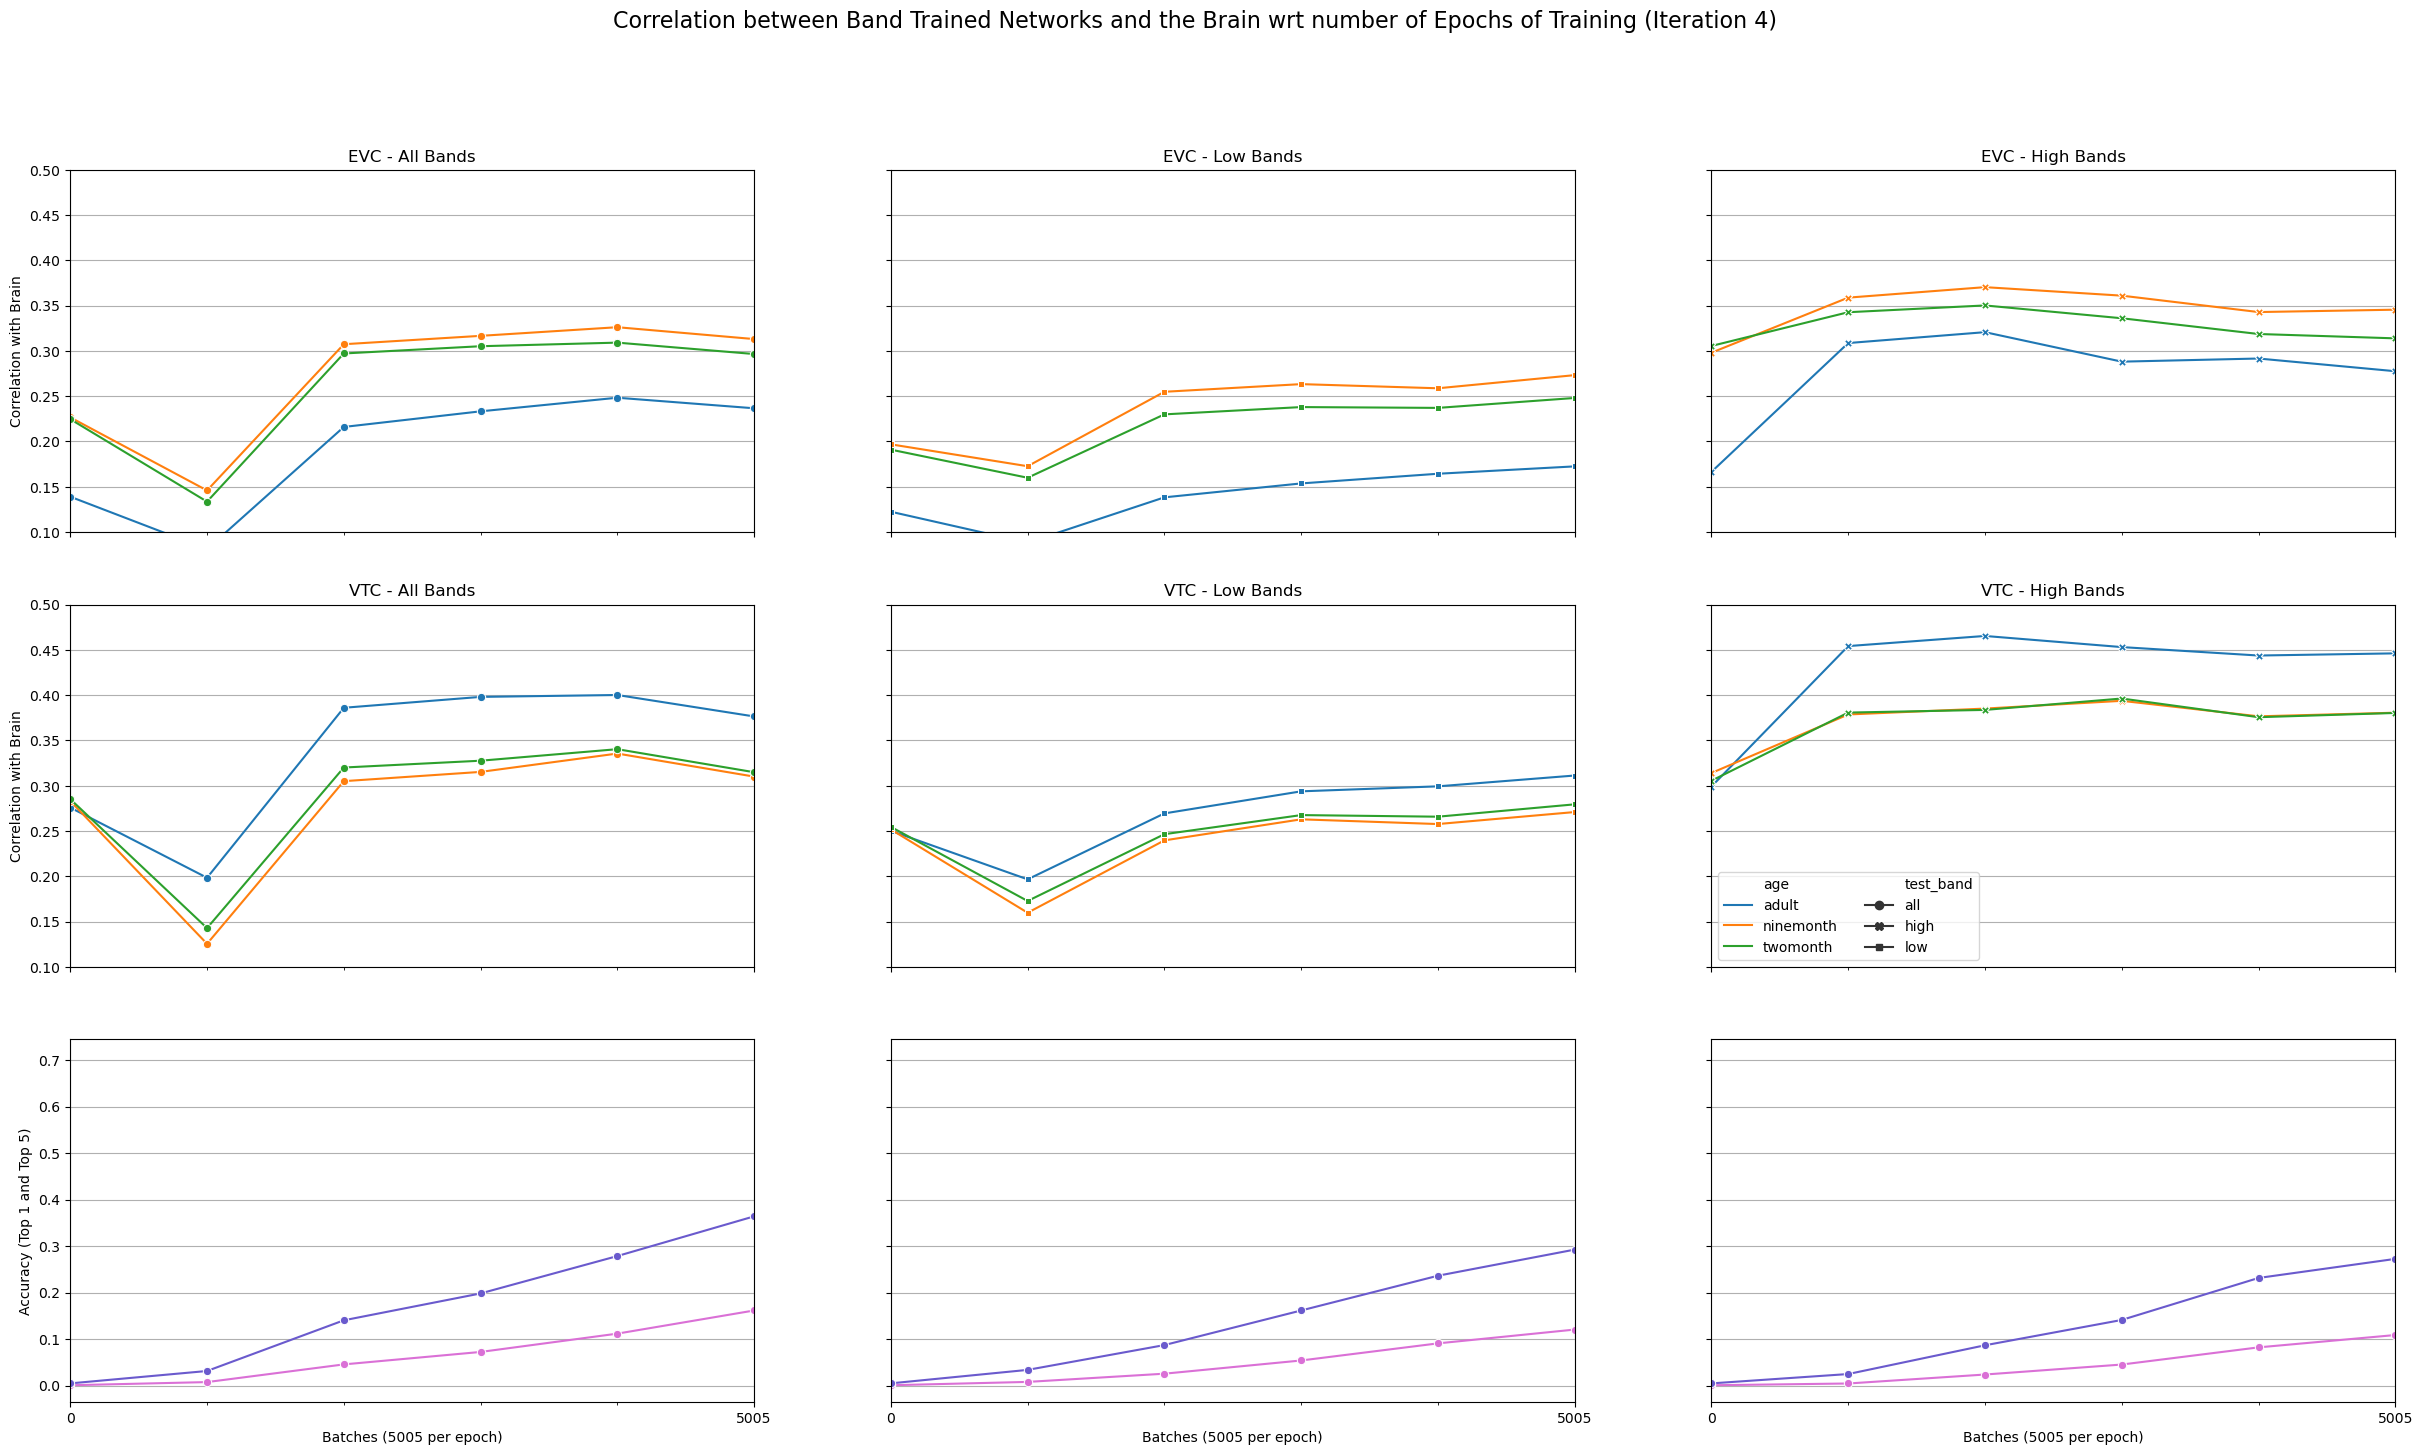

In [13]:
# Create a Plot from df_mean_across_layers with seaborn, with a column for each ROI and a row for each train band. Each plot will have a line for each age. Test bands will match train bands. 

# share y for each row



fig, ax = plt.subplots(len(roilist)+1,len(train_bands),figsize=(30,16), sharex=True,  sharey='row')


for train_idx, train_band in enumerate(train_bands):
    sns.lineplot(data=master_accuracy_df[(master_accuracy_df['train_band'] == train_band)], x='x_axis', y='top1acc', ax=ax[-1, train_idx], style='test_band' ,markers=True, dashes=False, color='orchid')#, hue_order=hue_order)#, palette=palette)
    sns.lineplot(data=master_accuracy_df[(master_accuracy_df['train_band'] == train_band)], x='x_axis', y='top5acc', ax=ax[-1, train_idx], style='test_band' ,markers=True, dashes=False,  color='slateblue')#, hue_order=hue_order)#, palette=palette)
        
    for roi_idx, roi in enumerate(roilist):
        # sns.lineplot(data=df_mean_across_layers[(df_mean_across_layers['roi'] == roi) & (df_mean_across_layers['train_band'] == train_band)], x='epoch', y='corr', hue='age', ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
        sns.lineplot(data=df_mean_across_layers[(df_mean_across_layers['roi'] == roi) & (df_mean_across_layers['train_band'] == train_band)], x='x_axis', y='corr', hue='age', ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)

        # # Add standard deviation across layers
        # sns.lineplot(data=df[(df['roi'] == roi) & (df['train_band'] == train_band)],x='epoch', y='corr', hue='age', marker='o', estimator=np.mean, errorbar='sd', ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
        # Error dedaults to 95% confidence interval ('ci', 95)
        # sns.lineplot(data=df[(df['roi'] == roi) & (df['train_band'] == train_band)],x='epoch', y='corr', hue='age', marker='o', estimator=np.mean, ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
    

for i in range(len(roilist)):
    for j in range(len(train_bands)):
         ax[i,j].set_title(f'{roi_labels[i]} - {train_bands[j].capitalize()} Bands')
         ax[i,j].set_ylabel('Correlation with Brain')
         ax[i,j].set_xlim(0,5005*max_epoch)
         ax[i,j].set_ylim(0.1,0.5)

# set x-axis values from epoch_list
for i in range(len(roilist)+1):
    for j in range(len(train_bands)):
       
        ax[i,j].set_xlabel('Batches (5005 per epoch)')
        # set major x axis ticks at multiples of 5005
        ax[i,j].xaxis.set_major_locator(plt.MultipleLocator(5005))
        ax[i,j].xaxis.set_minor_locator(plt.MultipleLocator(1001))
        # set y axis limits
        ax[i,j].xaxis.set_major_locator(plt.MultipleLocator(5005))
        
        # ax[i,j].set_ylim(0.1,0.6)
        
        ax[i,j].grid()
        ax[i,j].get_legend().remove()

# Plot legend in final subplot only, format with two columns
ax[1,-1].legend( ncol=2) 
ax[2,0].set_ylabel('Accuracy (Top 1 and Top 5)')

# TO DO: add legend to final subplot


# add title 
# fig.suptitle('Correlation with Brain for Different Ages wrt number of Epochs of Training', fontsize=16)
fig.suptitle(f'Correlation between Band Trained Networks and the Brain wrt number of Epochs of Training (Iteration {iter.split("-")[-1]})', fontsize=16)

plt.savefig(os.path.join(save_dir, f'corr_with_brain_byBand_comparedToAccuracy_{analysis_name}{distance_metric}_outputs{analysis_date}_epoch-{start}-{max_epoch}_iter-{iter.split("-")[-1]}.png'))

# show the plot
plt.show()

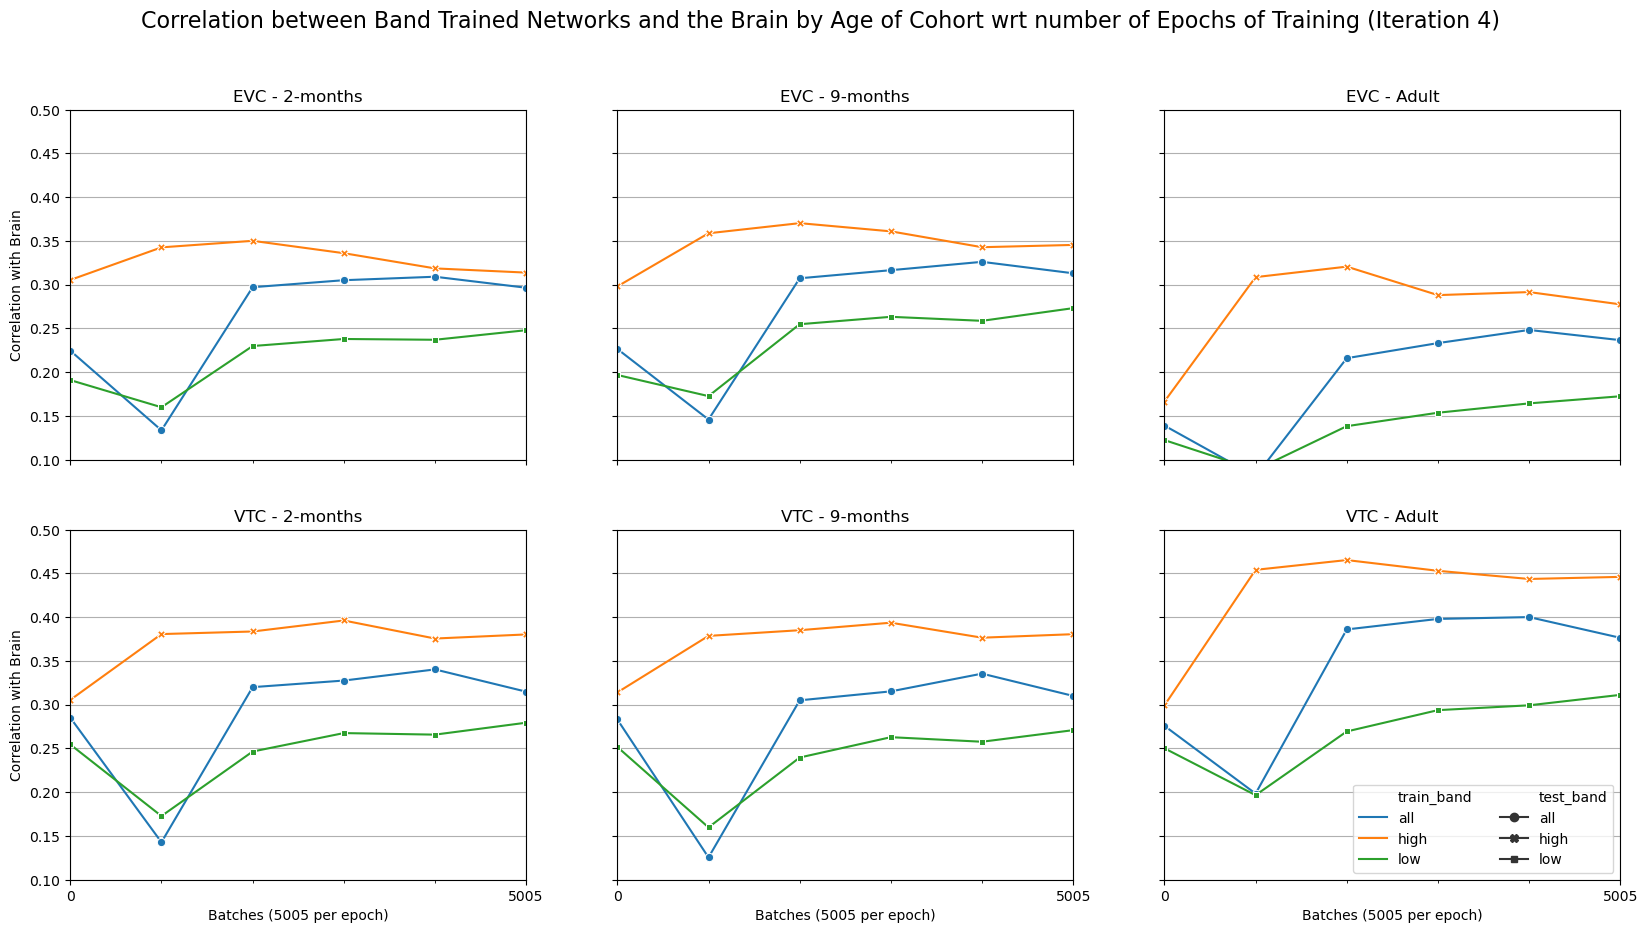

In [14]:
# Create a Plot from df_mean_across_layers with seaborn, with a column for each ROI and a row for each train band. Each plot will have a line for each age. Test bands will match train bands. 

# share y for each row



fig, ax = plt.subplots(len(roilist),len(agelist),figsize=(20,10), sharex=True,  sharey='row')


for age_idx, age in enumerate(agelist):

    for roi_idx, roi in enumerate(roilist):
        # sns.lineplot(data=df_mean_across_layers[(df_mean_across_layers['roi'] == roi) & (df_mean_across_layers['train_band'] == train_band)], x='epoch', y='corr', hue='age', ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
        sns.lineplot(data=df_mean_across_layers[(df_mean_across_layers['roi'] == roi) & (df_mean_across_layers['age'] == age)], x='x_axis', y='corr', hue='train_band', ax=ax[roi_idx,age_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)

        # # Add standard deviation across layers
        # sns.lineplot(data=df[(df['roi'] == roi) & (df['train_band'] == train_band)],x='epoch', y='corr', hue='age', marker='o', estimator=np.mean, errorbar='sd', ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
        # Error dedaults to 95% confidence interval ('ci', 95)
        # sns.lineplot(data=df[(df['roi'] == roi) & (df['train_band'] == train_band)],x='epoch', y='corr', hue='age', marker='o', estimator=np.mean, ax=ax[roi_idx,train_idx], style='test_band' ,markers=True, dashes=False)#, hue_order=hue_order)#, palette=palette)
    

for i in range(len(roilist)):
    for j in range(len(agelist)):
        ax[i,j].set_title(f'{roi_labels[i]} - {age_labels[j].capitalize()}')
        ax[i,j].set_ylabel('Correlation with Brain')
        ax[i,j].set_xlim(0,5005*max_epoch)
        ax[i,j].set_ylim(0.1,0.5)

        ax[i,j].set_xlabel('Batches (5005 per epoch)')
        # set major x axis ticks at multiples of 5005
        ax[i,j].xaxis.set_major_locator(plt.MultipleLocator(5005))
        ax[i,j].xaxis.set_minor_locator(plt.MultipleLocator(1001))
        # set y axis limits
        ax[i,j].xaxis.set_major_locator(plt.MultipleLocator(5005))
        
        # ax[i,j].set_ylim(0.1,0.6)
        
        ax[i,j].grid()
        ax[i,j].get_legend().remove()

# # Plot legend in final subplot only, format with two columns
ax[1,-1].legend( ncol=2) 

# add title 
fig.suptitle('Correlation with Brain for Different Ages wrt number of Epochs of Training', fontsize=16)
fig.suptitle(f'Correlation between Band Trained Networks and the Brain by Age of Cohort wrt number of Epochs of Training (Iteration {iter.split("-")[-1]})', fontsize=16)


# show the plot

plt.savefig(os.path.join(save_dir, f'corr_with_brain_byAge_{analysis_name}{distance_metric}_outputs{analysis_date}_epoch-{start}-{max_epoch}_iter-{iter.split("-")[-1]}.png'))
plt.show()